## LAB1: Gerações, representações e transformações de dados multivariados

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Duarte Gonçalves  
## Número: 46484

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab1.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.
# Ficheiros que não se encontrem em conformidade com o formato especificado não serão corrigidos!

<hr style="border:2px solid black"> </hr>


In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import scipy.linalg as la
rd.seed(42)

# Pergunta 1:
## a) Gere 5000 (5 mil) pontos a duas dimensões, em que a primeira dimensão é uma variável aleatória Gaussina de média 2 e variância 3, e em que a segunda dimensão é uma variável aleatória uniformemente distribuída entre $[-1, 3]$. Os pontos gerados deverão estar num matriz $X$ de $2\times5000$.
## b) Visualize os pontos gerados. Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala.

Covariancia:  2.9789161477410206
Média:  2.009702827532125
dim2:  [-0.32705368 -0.24026103  0.84284869 ...  1.91909055 -0.34131895
  1.26327197]

Media X:  [2.00970283 0.97930428]
Matriz de Covariância de X:    
 [[ 2.97891615 -0.01008472]
 [-0.01008472  1.3045455 ]]


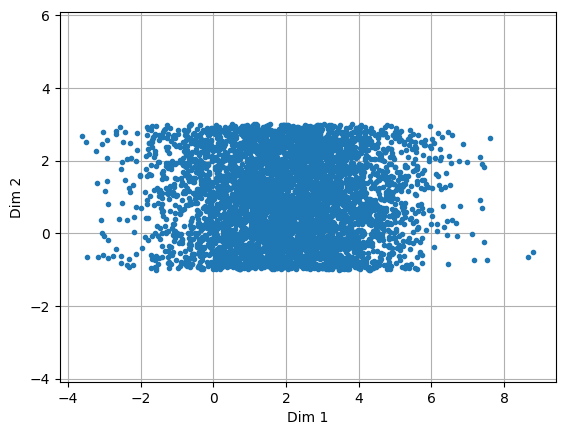

In [2]:
#a
N = 5000
dim = rd.randn(N)*np.sqrt(3)+2
print("Covariancia: ", np.cov(dim))
print("Média: ", np.mean(dim))

dim2 = rd.rand(N)*4-1
print("dim2: ", dim2)

print()
X = np.vstack((dim, dim2))      
print('Media X: ', np.mean(X, axis = 1))
print('Matriz de Covariância de X:    \n', np.cov(X))

#b
plt.plot(X[0,:], X[1,:], '.')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.axis('equal')
plt.grid()

# Pergunta 2:
## a) Através duma transformação matricial do tipo $X2=A\times X+b$ ($A$ matriz de $2\times2$, $b$ vetor de $2\times1$), transforme os dados de modo a estes terem média nula e matriz de covariância igual à matriz de identidade (de notar que a variância da primeira e da segunda dimensão de $X$ são 3 e 4/3, respetivamente).
## b) Através duma transformação matricial do tipo $X3=C\times X2$ ($C$ matriz de $2\times2$), transforme os dados de modo a estes terem a matriz de covariância $\Sigma=\begin{bmatrix}2.5&1\\1&0.5\end{bmatrix}$.
## c) Visualize os pontos gerados (matriz $X3$). Vizualise igualmente no mesmo gráfico os pontos da alínea anterior (matriz $X$). Certifique-se que no gráfico, ambas as dimensões se encontram na mesma escala. 

Matriz A: [[0.57735027 0.        ]
 [0.         0.8660254 ]]
Vetor b: [2 1]
Matriz de Covariância de X2: 
 [[ 0.99297205 -0.00504236]
 [-0.00504236  0.97840913]]
Media X2:  [ 0.00560193 -0.01792302]

Matriz C:  [[1.5 0.5]
 [0.5 0.5]]
Matriz de Covariância X3: 
 [[2.47122586 0.98428896]
 [0.98428896 0.49032411]]

Shape X:  (2, 5000)
Shape X3:  (2, 5000)


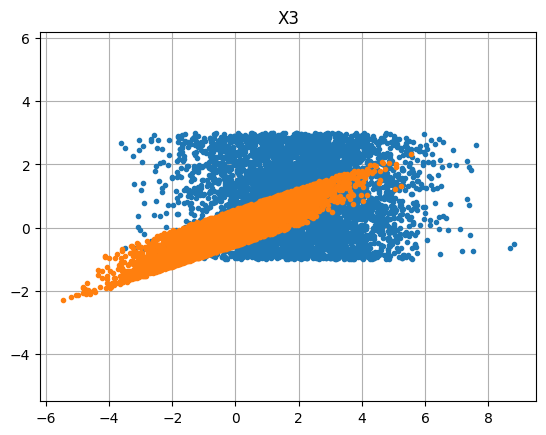

In [3]:
#a
A = np.diag(np.sqrt([1/3, 3/4]))
print("Matriz A:", A)

b = np.array([2,1])
print("Vetor b:",b)

X2 = np.dot(A,X-b[:,np.newaxis])


print('Matriz de Covariância de X2: \n', np.cov(X2))
print('Media X2: ', np.mean(X2, axis = 1))

#b
print()
C = la.sqrtm(np.array([[2.5,1.0],[1.0,0.5]]))
print("Matriz C: ", C)
X3 = np.dot(C, X2)
print('Matriz de Covariância X3: \n', np.cov(X3))

#c
print()
print("Shape X: ",X.shape)
print("Shape X3: ",X3.shape)
plt.plot(X[0,:],X[1,:],'.')
plt.plot(X3[0,:],X3[1,:],'.')
plt.title("X3")
plt.axis('equal')
plt.grid()


# Pergunta 3:
## Considere uma matriz $X4$ de $2\times10000$ obtida com a concatenação das matrizes $X$ e $X3$. Faça os histogramas de cada dimensão dos dados da matriz $X4$. Certifique-se que o número de intervalos é apropriado, e a sua largura também, para uma boa visualização dos mesmos.

In [4]:
X4 = np.hstack((X, X3))
print('Shape X4: ', X4.shape)

hx1, b1 = np.histogram(X4[0,:], np.linspace(np.min(X4[0,:]), np.max(X4[0,:])))
hx2, b2 = np.histogram(X4[1,:], np.linspace(np.min(X4[1,:]), np.max(X4[1,:])))

b1 = (b1[1:]+b1[:-1])/2
print("Intervalos Dim1: ", len(b1))
b2 = (b2[1:]+b2[:-1])/2
print("Intervalos Dim2: ", len(b2))

width1 = (np.abs(np.min(X4[0,:])) + np.max(X4[0,:])) / len(b1)
print("Largura Dimensão 1: ", width1) 
width2 = (np.abs(np.min(X4[1,:])) + np.max(X4[1,:])) / len(b2)
print("Largura Dimensão 2: ", width2) 

plt.bar(b1, hx1, width=width1, ec='k')
plt.title("Dimensão 1") 
plt.show()
plt.bar(b2, hx2, width=width2, ec='k')
plt.title("Dimensão 2")
plt.show()

Shape X4:  (2, 10000)
Intervalos Dim1:  49
Intervalos Dim2:  49
Largura Dimensão 1:  0.29118361324460357
Largura Dimensão 2:  0.10807797844766273
